# Bivariate Normal Distribution

This notebook would plot the joint density of a Bivariate Normal Distribution, consisting of two random variables X and Y. 
<br>
Running the code below would create an applet with 5 slidebars that let you control the 5 parameters of a bivariate normal distribution: X's mean and variance, Y's mean and variance, and the correlation between X and Y. 

Observe how the shape of the sampled points (1st plot) and the 3D Bell curve of the joint density (2nd plot) changes as each paremeter is shifted.


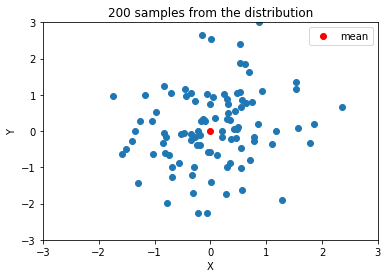

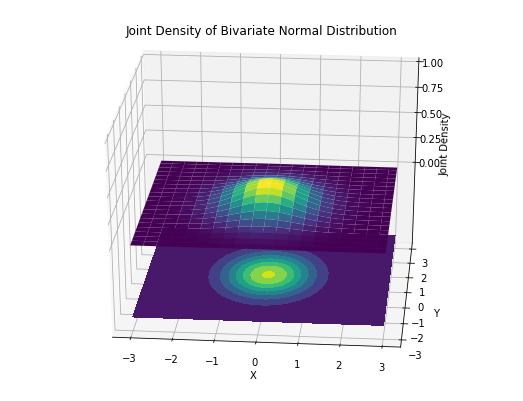

In [15]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# This applet is created based on the code from the following link: 
# https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.
    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.
    """
    try:
        n = mu.shape[0]
        Sigma_det = np.linalg.det(Sigma)
        Sigma_inv = np.linalg.inv(Sigma)
        N = np.sqrt((2*np.pi)**n * Sigma_det)
        # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
        # way across all the input variables.
        fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

        return np.exp(-fac / 2) / N
    
    except:
        print("Invalid covariance")
        return
        
def BVN(meanX, meanY, varX, varY, cov):
    meanY = float(meanY)
    meanX = float(meanX)
    varY = float(varY)
    varX = float(varX)
    cov = float(cov)

    print ("Observe how the shape of the sampled points (1st plot) and the 3D Bell curve of the joint density (2nd plot)" + \
         " changes as each paremeter is shifted.")
    
    # Our 2-dimensional distribution will be over variables X and Y
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 3, N)
    X, Y = np.meshgrid(X, Y)

    # Mean vector and covariance matrix
    mu = np.array([meanX, meanY])
    Sigma = np.array([[varX , cov], [cov,  varY]])

    # Randomly sample 200 points for the scatterplot
    samples = np.random.multivariate_normal(mu, Sigma, 100)
    plt.scatter(samples[:,0], samples[:,1])
    plt.plot(meanX, meanY, 'ro', label='mean')
    plt.legend()
    plt.title("200 samples from the distribution")
    plt.xlim(-3, 3)
    plt.xlabel("X")
    plt.ylim(-3, 3)
    plt.ylabel("Y")
    plt.show()
    
    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    # The distribution on the variables X, Y packed into pos.
    Z = multivariate_gaussian(pos, mu, Sigma)

    # Create a surface plot and projected filled contour plot under it.
    fig = plt.figure()
    fig.set_size_inches(9, 7)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap=cm.viridis)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Joint Density")
    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.7, cmap=cm.viridis)

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.8,1.0)
    ax.set_zticks(np.linspace(0,1.0,5))
    ax.view_init(27, -85)
    plt.title("Joint Density of Bivariate Normal Distribution")
    plt.show()

interact_manual(BVN, meanX=(-1.0, 1.0), meanY=(-1.0, 1.0), varX=(0.1, 1.0), varY=(0.1, 1.0), cov=(-1.0, 1.0))